# Huawei Private Cloud dataset release demo notebook
<b id="top"></b> 
This notebook explains how to load and use the Huawei Private dataset.

Table of contents links may only work when you clone the repo.

### Table of Contents

1. [Quick start: Plot requests per second](#quickstart1)
2. [Quick start: Plot requests per minute](#quickstart2)
3. [Per-second vs per-minute plots](#minutevssecond)
4. [Visualizing resource usage](#resourceusage)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from glob import glob
from tqdm import tqdm
import os
import gc

In [2]:
# Define home directory
rt = '../datasets/private_dataset/'
print('Reading from directory: {}'.format(rt))

Reading from directory: ../datasets/private_dataset/


<a id="quickstart1"></a>
## 1. Quick start: Plot requests per second
Plot requests per second for a given function. <a href="#top">[back to top]</a>

In [3]:
# Get all per-second requests files
filenames_list = glob(rt+'/requests_second/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} requests per second filenames'.format(len(filenames_list)))

['../datasets/private_dataset//requests_second/day_000.csv', '../datasets/private_dataset//requests_second/day_001.csv', '../datasets/private_dataset//requests_second/day_002.csv', '../datasets/private_dataset//requests_second/day_003.csv', '../datasets/private_dataset//requests_second/day_004.csv']
We have 141 requests per second filenames


In [4]:
# Reading all columns in all per-second requests files may take up signficant memory
dfs_list = []
for filename in tqdm(filenames_list):
    # Read the entire file, or read just the columns we want by passing usecols = ['time', 'day', 0, 1, 2] to pd.read_csv()
    # df_i = pd.read_csv(filename, index_col=None)
    df_i = pd.read_csv(filename, index_col=None, usecols = ['time', 'day', '33', '75', '160', '150', '161', '55', '66', '72', '164', '28'])
    dfs_list.append(df_i)
print('Concatenating dataframes')
df_requests = pd.concat(dfs_list)
df_requests

100%|██████████| 141/141 [00:36<00:00,  3.83it/s]


Concatenating dataframes


,day,time,28,33,55,66,72,75,150,160,161,164
0,0,0,816.0,NaN,NaN,1964.0,7614.0,22359.0,9425.0,6997.0,4690.0,1194.0
1,0,1,960.0,NaN,NaN,2013.0,9883.0,26684.0,9699.0,7434.0,4884.0,1223.0
2,0,2,1069.0,NaN,NaN,2024.0,12660.0,29264.0,10688.0,7709.0,5267.0,1308.0
3,0,3,922.0,NaN,NaN,2042.0,12403.0,27607.0,10624.0,7691.0,5228.0,1267.0
4,0,4,945.0,NaN,NaN,2082.0,12808.0,25907.0,10538.0,7811.0,5122.0,1328.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86395,234,20303995,1745.0,67449.0,NaN,3189.0,2337.0,24404.0,12024.0,8274.0,5591.0,1472.0
86396,234,20303996,1767.0,66931.0,NaN,2694.0,2210.0,24121.0,11926.0,8107.0,5476.0,1272.0
86397,234,20303997,1761.0,66561.0,NaN,2571.0,2227.0,23970.0,11731.0,8459.0,5615.0,1238.0
86398,234,20303998,1702.0,66121.0,NaN,2665.0,2295.0,24375.0,12033.0,8323.0,5606.0,1325.0


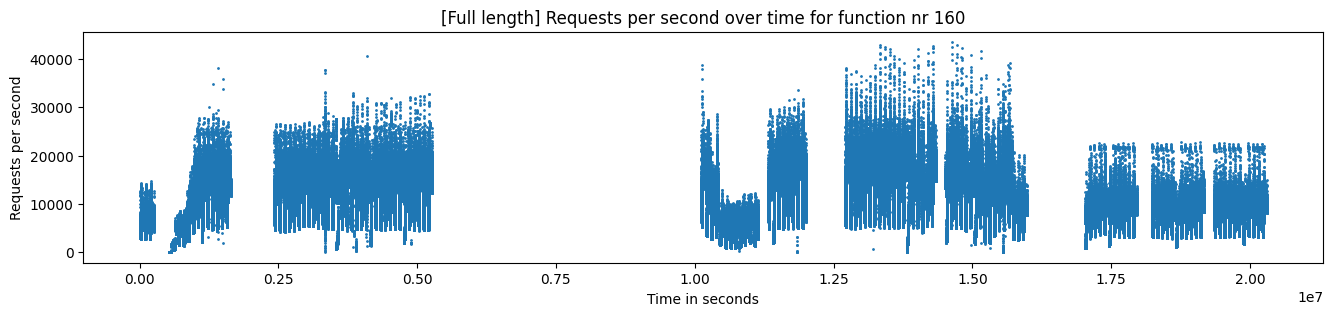

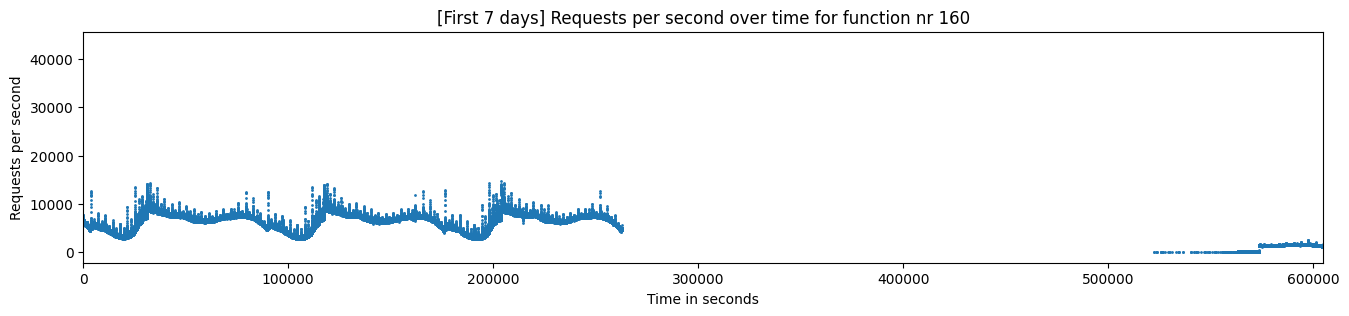

In [5]:
# Plot requests per second
fn_nr = 160

fig = plt.figure(figsize=(16, 3))

plt.scatter(df_requests['time'], df_requests[str(fn_nr)], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[Full length] Requests per second over time for function nr {}'.format(fn_nr))
plt.show()

n_days = 7
fig = plt.figure(figsize=(16, 3))
plt.scatter(df_requests['time'], df_requests[str(fn_nr)], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[First {} days] Requests per second over time for function nr {}'.format(n_days, str(fn_nr)))
plt.xlim(0, 86400*n_days)
plt.show()

<a id="quickstart2"></a>
## 2. Quick start: Plot requests per minute

Plot requests per minute for a given function. <a href="#top">[back to top]</a>

In [6]:
# Get all per-minute requests files
filenames_list = glob(rt+'/requests_minute/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} requests per second filenames'.format(len(filenames_list)))

['../datasets/private_dataset//requests_minute/day_000.csv', '../datasets/private_dataset//requests_minute/day_001.csv', '../datasets/private_dataset//requests_minute/day_002.csv', '../datasets/private_dataset//requests_minute/day_003.csv', '../datasets/private_dataset//requests_minute/day_004.csv']
We have 141 requests per second filenames


In [7]:
# Reading all columns in all per-minute requests files may take up signficant memory
dfs_list = []
for filename in tqdm(filenames_list):
    # read the entire file, or read just the columns we want by passing usecols = ['time', 'day', 0, 1, 2] to pd.read_csv()
    df_i = pd.read_csv(filename, index_col=None)
    dfs_list.append(df_i)
print('Concatenating dataframes')
df_requests_minute = pd.concat(dfs_list)
df_requests_minute

100%|██████████| 141/141 [00:03<00:00, 44.49it/s]


Concatenating dataframes


,day,time,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,0,0,NaN,NaN,NaN,NaN,6.0,6.0,98.0,NaN,...,833.0,NaN,NaN,NaN,2891,24.0,NaN,NaN,NaN,23.0
1,0,60,NaN,NaN,NaN,NaN,29.0,29.0,83.0,NaN,...,752.0,NaN,NaN,NaN,2607,16.0,NaN,NaN,NaN,23.0
2,0,120,NaN,NaN,NaN,NaN,12.0,12.0,72.0,NaN,...,835.0,NaN,NaN,NaN,2598,9.0,NaN,NaN,NaN,25.0
3,0,180,NaN,NaN,NaN,NaN,18.0,18.0,106.0,NaN,...,1005.0,NaN,NaN,NaN,2617,17.0,NaN,NaN,NaN,28.0
4,0,240,NaN,NaN,NaN,NaN,4.0,4.0,154.0,NaN,...,858.0,NaN,NaN,NaN,2572,26.0,NaN,NaN,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,234,20303700,NaN,264.0,152.0,NaN,NaN,NaN,136.0,NaN,...,NaN,NaN,NaN,NaN,33038,14.0,NaN,NaN,NaN,19.0
1436,234,20303760,NaN,278.0,155.0,NaN,NaN,NaN,85.0,NaN,...,NaN,NaN,NaN,NaN,33013,18.0,NaN,NaN,NaN,28.0
1437,234,20303820,NaN,260.0,150.0,NaN,NaN,NaN,125.0,NaN,...,NaN,NaN,NaN,NaN,32686,8.0,NaN,NaN,NaN,26.0
1438,234,20303880,NaN,279.0,140.0,NaN,NaN,NaN,129.0,NaN,...,NaN,NaN,NaN,NaN,31737,13.0,NaN,NaN,NaN,37.0


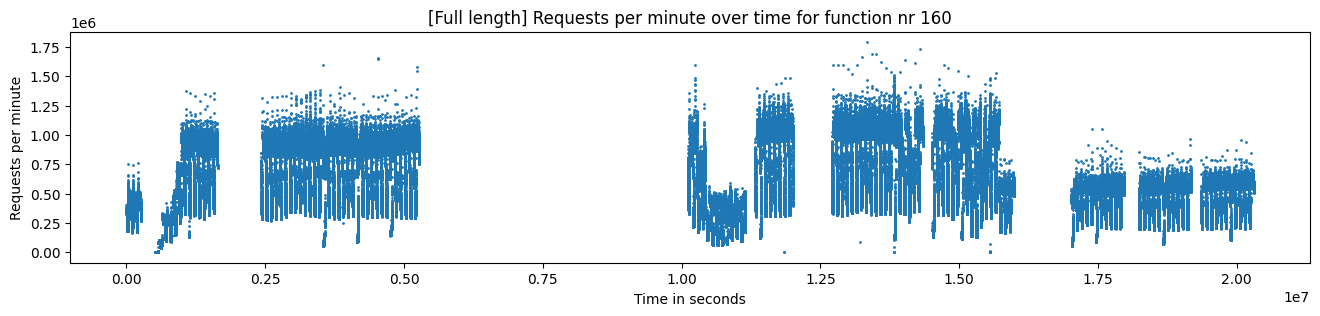

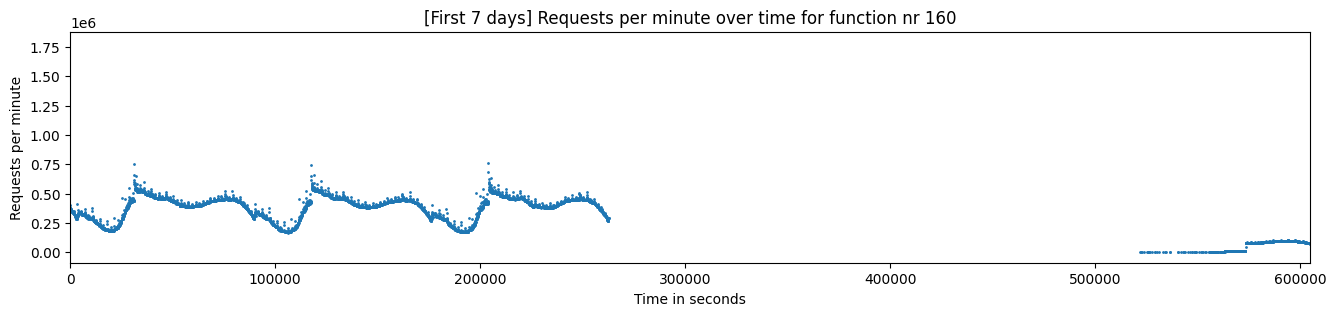

In [8]:
# Plot requests per minute
fn_nr = 160

fig = plt.figure(figsize=(16, 3))

plt.scatter(df_requests_minute['time'], df_requests_minute[str(fn_nr)], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per minute')
plt.title('[Full length] Requests per minute over time for function nr {}'.format(fn_nr))
plt.show()

n_days = 7
fig = plt.figure(figsize=(16, 3))
plt.scatter(df_requests_minute['time'], df_requests_minute[str(fn_nr)], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per minute')
plt.title('[First {} days] Requests per minute over time for function nr {}'.format(n_days, str(fn_nr)))
plt.xlim(0, 86400*n_days)
plt.show()

<a id="minutevssecond"></a>
## 3. Per-second vs per-minute plots

This section shows how we can compare per-second and per-minute data.

The original requests data is per second. To get per-minute data, we ADDED the number of requests in non-overlapping 60-second windows.

Since all timestamps are in seconds, we can plot per-second and per-minute data on the same plot to see the effect of the aggregation. We add large blue markers to the per-minute plot to show the exact locations of the aggregated points.

<a href="#top">[back to top]</a>

In [9]:
# Read per-second and per-minute requests files for the same day
df_req_sec = pd.read_csv(rt + '/requests_second/day_000.csv')
df_req_min = pd.read_csv(rt + '/requests_minute/day_000.csv')

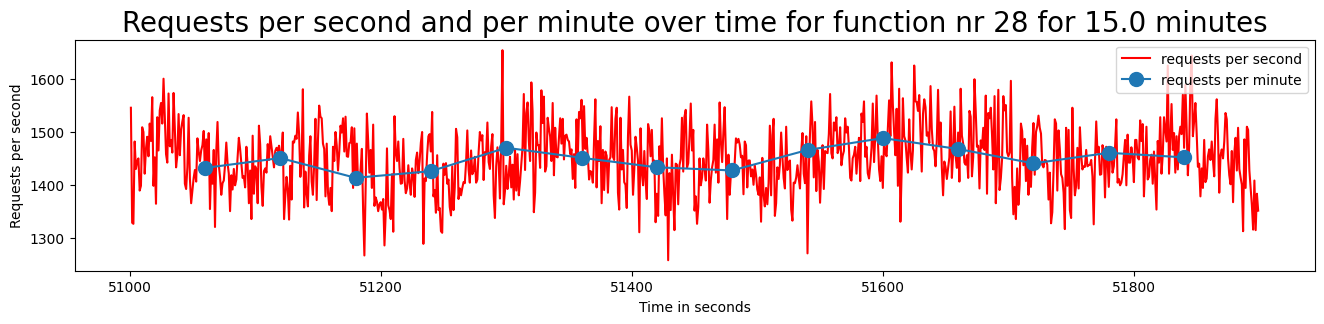

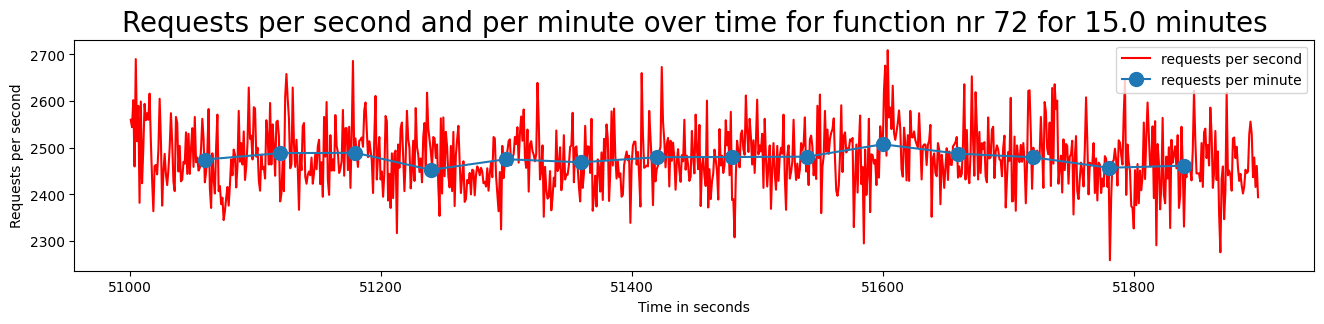

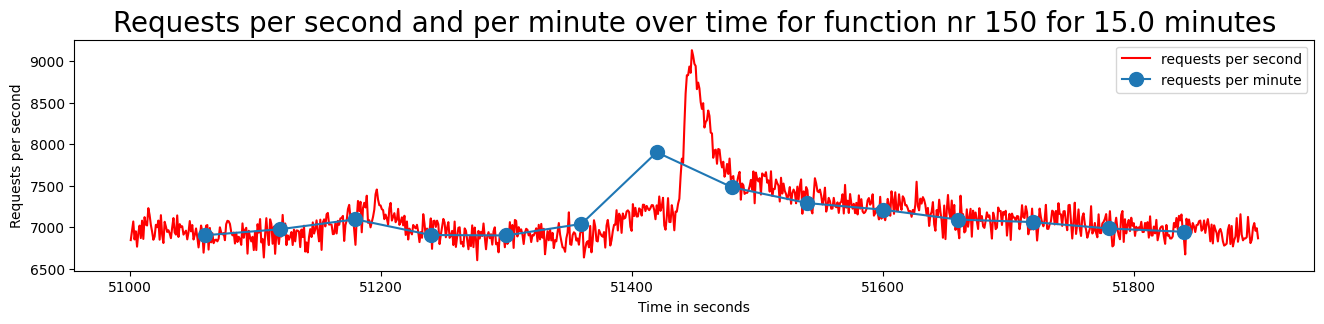

In [10]:
# Select some functions to visualise
fn_nrs_list = ['28', '72', '150']

# Define an interval to zoom in on with of size 'gap' in seconds
start = int(51000)
gap = 60*60*0.25            
end = start + gap

# Slice dataframes
df_req_sec_slice = df_req_sec[(df_req_sec['time']<end) & (df_req_sec['time']>start)]
df_req_min_slice = df_req_min[(df_req_min['time']<end) & (df_req_min['time']>start)]

# Loop over all functions to plot them
for fn_nr in fn_nrs_list:
    fig = plt.figure(figsize=(16, 3))

    plt.plot(df_req_sec_slice['time'], df_req_sec_slice[fn_nr], color='red', label='requests per second')

    # Note that we need to divide requests per minute by 60 because the aggregated version has been SUMMED
    plt.plot(df_req_min_slice['time'], df_req_min_slice[fn_nr]/(60), label='requests per minute', marker=".", markersize=20)
    plt.legend(loc='upper right')
    plt.xlabel('Time in seconds')
    plt.ylabel('Requests per second')
    plt.title('Requests per second and per minute over time for function nr {} for {} minutes'.format(fn_nr, (end-start)/60), fontsize=20)
    plt.show()

<a id="resourceusage"></a>
## 4. Visualizing resource usage
Just like requests, we can visualise CPU usage over time. Note that CPU usage is a percentage of CPU limit. This section focuses on CPU usage, but a similar analysis can be applied to memory usage. We also show how to compute total CPU usage and CPU limit for all pods serving this function. 

<a href="#top">[back to top]</a>

In [11]:
# Select function we want to plot
target_fn = '150'

In [12]:
# Read CPU usage files
filenames_list = glob(rt+'/cpu_usage_minute/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} cpu usage per minute filenames'.format(len(filenames_list)))

dfs_list = []
for filename in tqdm(filenames_list):
    df_i = pd.read_csv(filename, index_col=None)
    dfs_list.append(df_i)

df_cpu_usage = pd.concat(dfs_list)
df_cpu_usage

['../datasets/private_dataset//cpu_usage_minute/day_000.csv', '../datasets/private_dataset//cpu_usage_minute/day_001.csv', '../datasets/private_dataset//cpu_usage_minute/day_002.csv', '../datasets/private_dataset//cpu_usage_minute/day_003.csv', '../datasets/private_dataset//cpu_usage_minute/day_004.csv']
We have 141 cpu usage per minute filenames


100%|██████████| 141/141 [00:02<00:00, 47.18it/s]


,day,time,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,0,0,NaN,NaN,NaN,NaN,0.003,0.003,0.003,NaN,...,0.005,NaN,NaN,NaN,0.056,0.044,NaN,NaN,NaN,0.001
1,0,60,NaN,NaN,NaN,NaN,0.004,0.004,0.004,NaN,...,0.005,NaN,NaN,NaN,0.056,0.028,NaN,NaN,NaN,0.001
2,0,120,NaN,NaN,NaN,NaN,0.003,0.003,0.003,NaN,...,0.005,NaN,NaN,NaN,0.056,0.017,NaN,NaN,NaN,0.002
3,0,180,NaN,NaN,NaN,NaN,0.004,0.003,0.004,NaN,...,0.005,NaN,NaN,NaN,0.053,0.010,NaN,NaN,NaN,0.001
4,0,240,NaN,NaN,NaN,NaN,0.003,0.004,0.004,NaN,...,0.005,NaN,NaN,NaN,0.058,0.028,NaN,NaN,NaN,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,234,20303700,NaN,0.010,0.009,NaN,NaN,NaN,0.004,NaN,...,NaN,NaN,NaN,NaN,0.068,0.015,NaN,NaN,NaN,0.001
1436,234,20303760,NaN,0.015,0.008,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,0.066,0.020,NaN,NaN,NaN,0.002
1437,234,20303820,NaN,0.014,0.015,NaN,NaN,NaN,0.004,NaN,...,NaN,NaN,NaN,NaN,0.067,0.012,NaN,NaN,NaN,0.002
1438,234,20303880,NaN,0.013,0.009,NaN,NaN,NaN,0.004,NaN,...,NaN,NaN,NaN,NaN,0.068,0.021,NaN,NaN,NaN,0.002


In [13]:
# Read CPU limit files
filenames_list = glob(rt+'/cpu_limit_minute/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} cpu limit per minute filenames'.format(len(filenames_list)))

dfs_list = []
for filename in tqdm(filenames_list):
    df_i = pd.read_csv(filename, index_col=None)
    dfs_list.append(df_i)

df_cpu_limit = pd.concat(dfs_list)
df_cpu_limit

['../datasets/private_dataset//cpu_limit_minute/day_000.csv', '../datasets/private_dataset//cpu_limit_minute/day_001.csv', '../datasets/private_dataset//cpu_limit_minute/day_002.csv', '../datasets/private_dataset//cpu_limit_minute/day_003.csv', '../datasets/private_dataset//cpu_limit_minute/day_004.csv']
We have 141 cpu limit per minute filenames


100%|██████████| 141/141 [00:02<00:00, 51.98it/s]


,day,time,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,0,0,NaN,NaN,NaN,NaN,0.45,0.45,0.95,NaN,...,1.95,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95
1,0,60,NaN,NaN,NaN,NaN,0.45,0.45,0.95,NaN,...,1.95,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95
2,0,120,NaN,NaN,NaN,NaN,0.45,0.45,0.95,NaN,...,1.95,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95
3,0,180,NaN,NaN,NaN,NaN,0.45,0.45,0.95,NaN,...,1.95,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95
4,0,240,NaN,NaN,NaN,NaN,0.45,0.45,0.95,NaN,...,1.95,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,234,20303700,NaN,0.95,0.95,NaN,NaN,NaN,0.95,NaN,...,NaN,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95
1436,234,20303760,NaN,0.95,0.95,NaN,NaN,NaN,0.95,NaN,...,NaN,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95
1437,234,20303820,NaN,0.95,0.95,NaN,NaN,NaN,0.95,NaN,...,NaN,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95
1438,234,20303880,NaN,0.95,0.95,NaN,NaN,NaN,0.95,NaN,...,NaN,NaN,NaN,NaN,0.95,1.95,NaN,NaN,NaN,1.95


In [14]:
# Read number of instances files
filenames_list = glob(rt+'/instances_minute/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} instances per minute filenames'.format(len(filenames_list)))

dfs_list = []
for filename in tqdm(filenames_list):
    df_i = pd.read_csv(filename, index_col=None)
    dfs_list.append(df_i)

df_instances = pd.concat(dfs_list)
df_instances

['../datasets/private_dataset//instances_minute/day_000.csv', '../datasets/private_dataset//instances_minute/day_001.csv', '../datasets/private_dataset//instances_minute/day_002.csv', '../datasets/private_dataset//instances_minute/day_003.csv', '../datasets/private_dataset//instances_minute/day_004.csv']
We have 141 instances per minute filenames


100%|██████████| 141/141 [00:02<00:00, 63.95it/s]


,day,time,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,1.0,NaN,NaN,NaN,20,3,NaN,NaN,NaN,1.0
1,0,60,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,1.0,NaN,NaN,NaN,20,3,NaN,NaN,NaN,1.0
2,0,120,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,1.0,NaN,NaN,NaN,20,3,NaN,NaN,NaN,1.0
3,0,180,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,1.0,NaN,NaN,NaN,20,3,NaN,NaN,NaN,1.0
4,0,240,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,1.0,NaN,NaN,NaN,20,3,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,234,20303700,NaN,1.0,1.0,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,200,10,NaN,NaN,NaN,1.0
1436,234,20303760,NaN,1.0,1.0,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,200,10,NaN,NaN,NaN,1.0
1437,234,20303820,NaN,1.0,1.0,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,200,10,NaN,NaN,NaN,1.0
1438,234,20303880,NaN,1.0,1.0,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,200,10,NaN,NaN,NaN,1.0


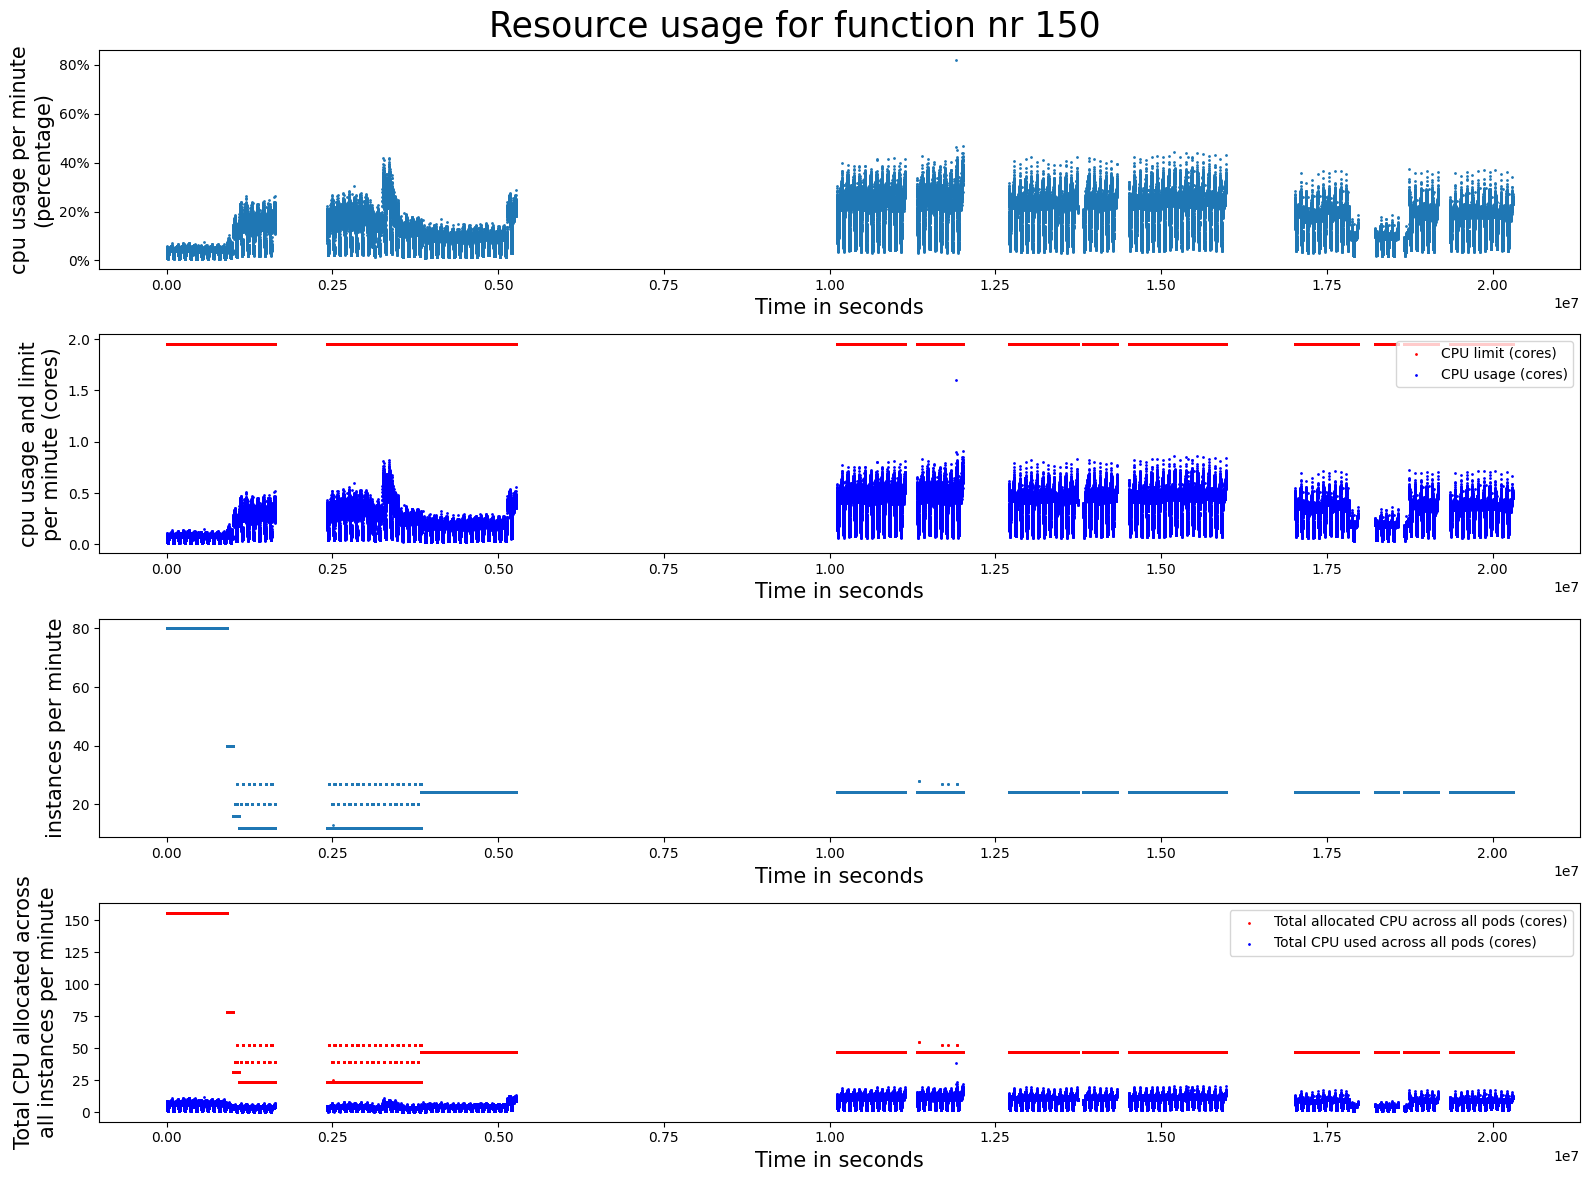

In [15]:
# Plot CPU usage as percentage of limit, CPU usage as absolute number of cores used, 
# and total number of cores used and allocated across all instances for this function

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 12))
xy_label_fontsize = 15

# Plot CPU usage percentage over time
ax[0].scatter(df_cpu_usage['time'], df_cpu_usage[target_fn], s=1)
ax[0].set_xlabel('Time in seconds', fontsize=xy_label_fontsize)
ax[0].set_ylabel('cpu usage per minute\n(percentage)', fontsize=xy_label_fontsize)
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Plot CPU limit over time
ax[1].scatter(df_cpu_limit['time'], df_cpu_limit[target_fn], s=1, c='r', label='CPU limit (cores)')
ax[1].set_xlabel('Time in seconds', fontsize=xy_label_fontsize)
ax[1].set_ylabel('cpu usage and limit\nper minute (cores)', fontsize=xy_label_fontsize)

# Plot absolute CPU usage over time (in cores)
ax[1].scatter(df_cpu_limit['time'], df_cpu_usage[target_fn]*df_cpu_limit[target_fn], s=1, c='b', label='CPU usage (cores)')
ax[1].legend(loc='upper right')

# Plot number of instances over time
ax[2].scatter(df_instances['time'], df_instances[target_fn], s=1)
ax[2].set_xlabel('Time in seconds', fontsize=xy_label_fontsize)
ax[2].set_ylabel('instances per minute', fontsize=xy_label_fontsize)

# Plot total amount of CPU cores allocated to this function across all pods
ax[3].scatter(df_instances['time'], df_instances[target_fn]*df_cpu_limit[target_fn], s=1, c='r', label='Total allocated CPU across all pods (cores)')
ax[3].set_xlabel('Time in seconds', fontsize=xy_label_fontsize)
ax[3].set_ylabel('Total CPU allocated across\nall instances per minute', fontsize=xy_label_fontsize)

# Plot total amount of CPU cores used across all pods
ax[3].scatter(df_instances['time'], df_instances[target_fn]*df_cpu_limit[target_fn]*df_cpu_usage[target_fn], s=1, c='b', label='Total CPU used across all pods (cores)')
ax[3].legend(loc='upper right')


plt.suptitle(f'Resource usage for function nr {target_fn}', fontsize=25)
plt.tight_layout()
plt.show()